<a href="https://colab.research.google.com/github/ChecinskiBartlomiej/UM/blob/main/UM_hw_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






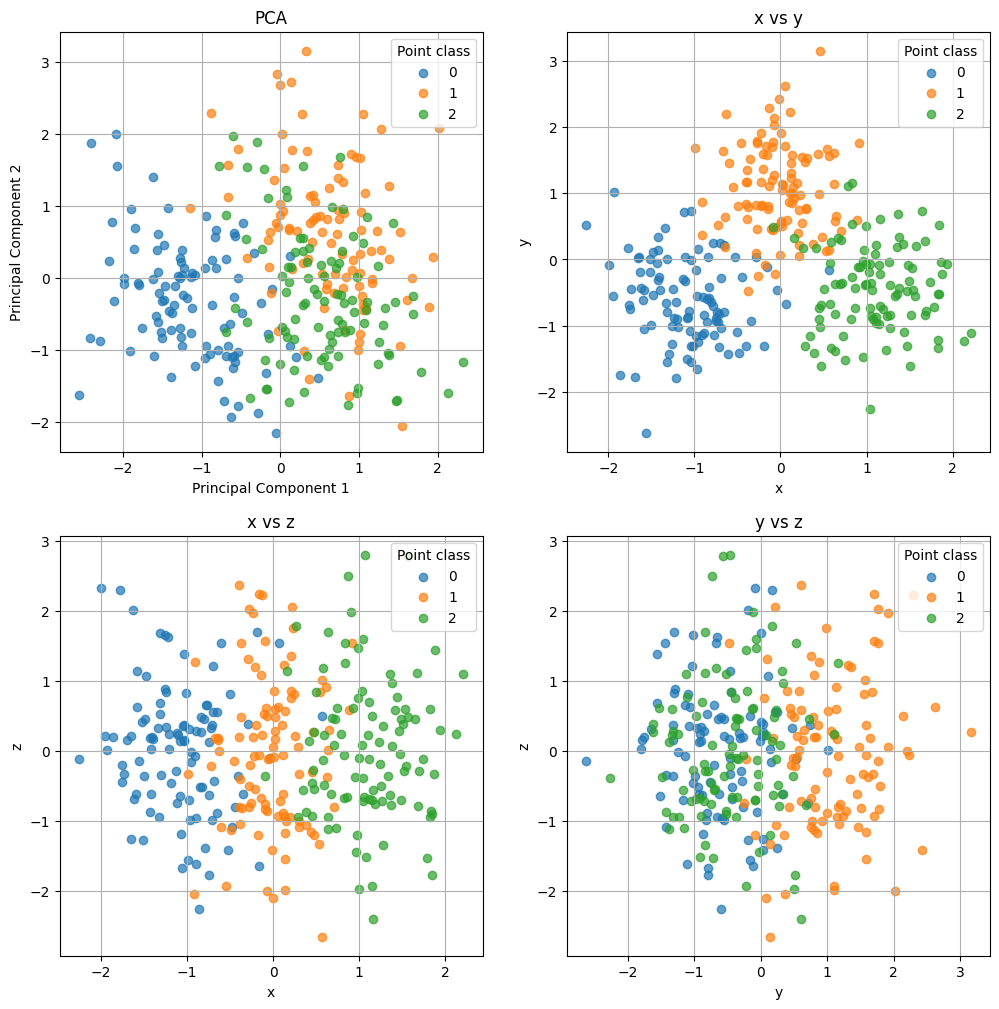

In [ ]:
#Read dataset and preprocess
import pandas as pd
url = 'https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv'
df = pd.read_csv(url)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
classes = Y.unique()

# Center and standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) #X is now numpy type array

# Perform PCA and reduce the data to 2 components for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

#plot PCA
import matplotlib.pyplot as plt

fig1, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, q in enumerate(classes):
    axes[0,0].scatter(XV[Y==i, 0], XV[Y==i, 1], label=q, alpha=0.7)

axes[0,0].set_title("PCA")
axes[0,0].set_xlabel("Principal Component 1")
axes[0,0].set_ylabel("Principal Component 2")
axes[0,0].legend(title="Point class", loc="upper right")
axes[0,0].grid(True)

#plot x vs y
for i, q in enumerate(classes):
    axes[0,1].scatter(X[Y==i, 0], X[Y==i, 1], label=q, alpha=0.7)

axes[0,1].set_title("x vs y")
axes[0,1].set_xlabel("x")
axes[0,1].set_ylabel("y")
axes[0,1].legend(title="Point class", loc="upper right")
axes[0,1].grid(True)

#plot x vs z
for i, q in enumerate(classes):
    axes[1,0].scatter(X[Y==i, 0], X[Y==i, 2], label=q, alpha=0.7)

axes[1,0].set_title("x vs z")
axes[1,0].set_xlabel("x")
axes[1,0].set_ylabel("z")
axes[1,0].legend(title="Point class", loc="upper right")
axes[1,0].grid(True)

#plot y vs z
for i, q in enumerate(classes):
    axes[1,1].scatter(X[Y==i, 1], X[Y==i, 2], label=q, alpha=0.7)

axes[1,1].set_title("y vs z")
axes[1,1].set_xlabel("y")
axes[1,1].set_ylabel("z")
axes[1,1].legend(title="Point class", loc="upper right")
axes[1,1].grid(True)

plt.show()

Visual inspection suggests that PCA does not improve the separation of data points from different clusters compared to the original feature spaces. One can argue that PCA plot looks cleaner that y vs z plot, but the difference is subtle if any. It seems that PCA plot is worse than x vs y plot.

Let's examine this more quantitatively by evaluating clusters quality using Silhouette Score. Recall that the silhouette score (*pl. wartość* lub *wskaźnik sylwetki*) assesses the balance between cluster compactness and separation. For a single point $i$, the silhouette value is:

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

where:

- $a(i)$ is the average distance between $i$ and all other points in the same cluster. It measures *compactness* of $i$, i.e. how close the point is to others in its own cluster.
- $b(i)$ is the minimum average distance between $i$ and the points in the  neighboring cluster (minimum average distance makes this cluster the nearest). It measures *separation* of $i$, i.e. how far the point is from points in the nearest cluster.

For each point, the silhouette value measures the difference between compactness and separation.

The silhouette value is then normalized and ranges between $-1$ and $1$:

- $s(i) \approx 1$: The point is **well-clustered**, meaning it is close to points in its own cluster and far from points in other clusters.
- $s(i) \approx 0$: The point is on or **near the boundary between clusters**.
- $s(i) \approx -1$: The point is likely **misclassified**, as it is closer to a different cluster than to the cluster it was assigned.

The overall silhouette score for the clustering is the mean silhouette value across all points:

$$ S = \frac{1}{n} \sum_{i=1}^n s(i) $$

Values close to $1$ indicate well-separated and compact clusters, while values near $0$ or negative suggest overlapping clusters.

---



In [ ]:
#evaluate clustering
from sklearn.metrics import silhouette_score

score_pca = silhouette_score(XV, Y)
print("Silhouette Score pca:", score_pca)

score_xy = silhouette_score(X[:, :2], Y)
print("Silhouette Score xy:", score_xy)

score_xz = silhouette_score(X[:, [0,2]], Y)
print("Silhouette Score xz:", score_xz)

score_yz = silhouette_score(X[:, [1,2]], Y)
print("Silhouette Score yz:", score_yz)

Silhouette Score pca: 0.17063822067114146
Silhouette Score xy: 0.45963037516053684
Silhouette Score xz: 0.19333521058113803
Silhouette Score yz: 0.06912671149096682


This is consistent with previous analysis conducted solely by visual inspection.

Why is it happening? Why doesn't PCA improve the separation? PCA does not take into account the labels, so during the dimensionality reduction we can lose directions which were crucial for differentiating data because they did not explain much variance.

Let's now look at what happens if we do not standardize the data before PCA. Start by plotting the non-standardized data.

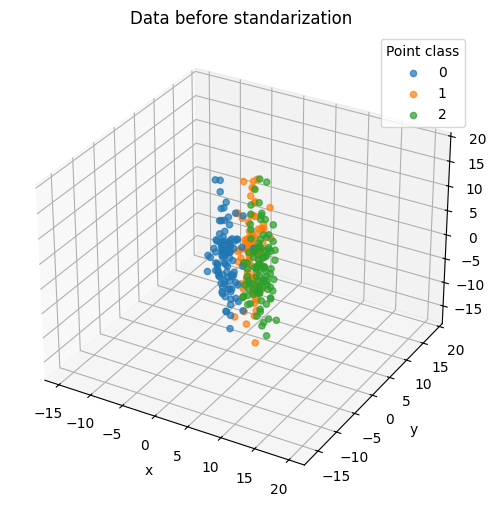

In [ ]:
#plot data before standarizing
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
classes = Y.unique()

fig2 = plt.figure(figsize=(6,6))
ax = fig2.add_subplot(111, projection='3d')
for i, q in enumerate(classes):
    ax.scatter(X[Y==i].iloc[:, 0], X[Y==i].iloc[:, 1], X[Y==i].iloc[:, 2], label=q, alpha=0.7)

#Gather limits
x_limits = ax.get_xlim3d()
y_limits = ax.get_ylim3d()
z_limits = ax.get_zlim3d()

#Calculate ranges
x_range = abs(x_limits[1] - x_limits[0])
y_range = abs(y_limits[1] - y_limits[0])
z_range = abs(z_limits[1] - z_limits[0])
max_range = max(x_range, y_range, z_range)

#Calculate mid points
mid_x = (x_limits[0] + x_limits[1]) / 2
mid_y = (y_limits[0] + y_limits[1]) / 2
mid_z = (z_limits[0] + z_limits[1]) / 2

#Set new limits
ax.set_xlim3d([mid_x - max_range/2, mid_x + max_range/2])
ax.set_ylim3d([mid_y - max_range/2, mid_y + max_range/2])
ax.set_zlim3d([mid_z - max_range/2, mid_z + max_range/2])

ax.set_title("Data before standarization")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(title="Point class")
ax.grid(True)
plt.show()

We can find principal components by maximizing the variance of the projected data points onto a lower-dimensional subspace. We can see that the direction (0,0,1) is a promising candidate for the first principal component. If we omit it and take (1,0,0) and (0,1,0) as our principal components, we get beautiful clustering. Also, we see that projecting data onto the (0,0,1) direction blends colors. This happened because the data points vary along the z-axis the most. These heuristics suggest that we should standardize the data before PCA. Let's check whether our intuition is correct.

In [ ]:
#perform PCA on non standarized data
pca2 = PCA(n_components = 2)
XV2 = pca2.fit_transform(X)
#print principal components
print(pca2.components_)

[[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
 [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]


As expected principal components is close to (0,0,1).

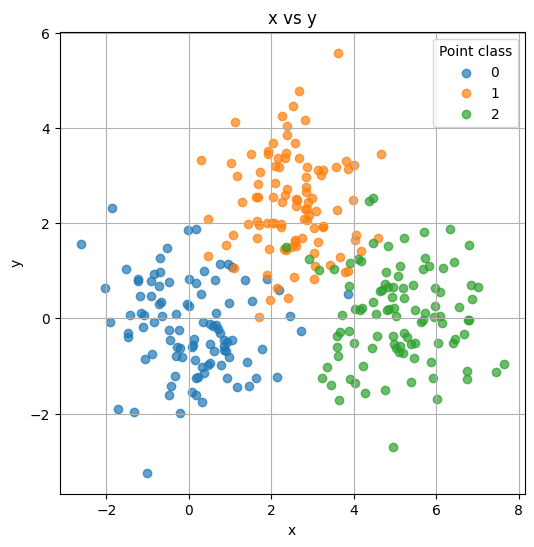

In [ ]:
fig3, ax = plt.subplots(figsize=(6,6))
for i, q in enumerate(classes):
    ax.scatter(X[Y==i].iloc[:, 0], X[Y==i].iloc[:, 1], label=q, alpha=0.7)

ax.set_title("x vs y")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(title="Point class", loc="upper right")
ax.grid(True)
plt.show()

Omitting first principal component gives good separation.